# Health Insurance claim prediction (Machine Learning)


### The goal is to find the best estimator of insurance charges using machine learning algorithms.
#### Random Forest, Bayesian regression and LinearRegression.

This dataset was retrieved from Kaggle's public datasets: Kaggle: 
https://docs.google.com/spreadsheets/d/1j3NQzptNjuc4KuqPayxETVntEBmi-KFdET7831Y1yzQ/edit?usp=sharing and describes characteristics of members of a health insurance plan.Conducted a detailed exploratory data analysis (EDA) to make better sense of the data. EDA is the process of figuring out what the data can tell us and can be used to find patterns, relationships, or anomalies to inform our subsequent analysis. There are endless ways to perform EDA, and we will explore some of them using the seaborn visualization library.

### Random Forest wins with a variance score of 97% against training data, and 84% against test data. It also has the lowest root MSE value.


### Importing libraries

In [310]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [311]:
#os.chdir("C:\\Users\\12172\\Desktop\\Course\\Resume_projects\\Health Insurnace_claims")

os.chdir("C:\\Users\\12172")

In [312]:
data = pd.read_csv('insurance.csv')
print(data.shape)

data.head(5)

(1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Exploratory Data Analysis

In [313]:
#data.info()

# check for missing values
missing_values = data.isnull().sum().sort_values(ascending = False)
missing_values

charges     0
region      0
smoker      0
children    0
bmi         0
sex         0
age         0
dtype: int64

In [314]:
data.describe()


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


It looks like everything is within acceptable ranges. For example, age is between 18 and 64, which makes sense given that this is a dataset of adults on a commercial insurance plan. Next, we check the head (top 5 rows) of the dataset.

No inconsistencies are identified. Let's move on to create a pairs plot. This plots pairwise relationships in a dataset, and is a great method to identify trends for follow-up analysis. By default, this function will create a grid of axes such that each variable in our dataset will by shared in the y-axis across a single row and in the x-axis across a single column. The diagonal axes are treated differently, drawing a plot to show the univariate distribution of the data for the variable in that column. Fortunately seaborn gives us an easy way to implement the pairs plot. [1]

In [315]:
data.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<Figure size 720x432 with 0 Axes>

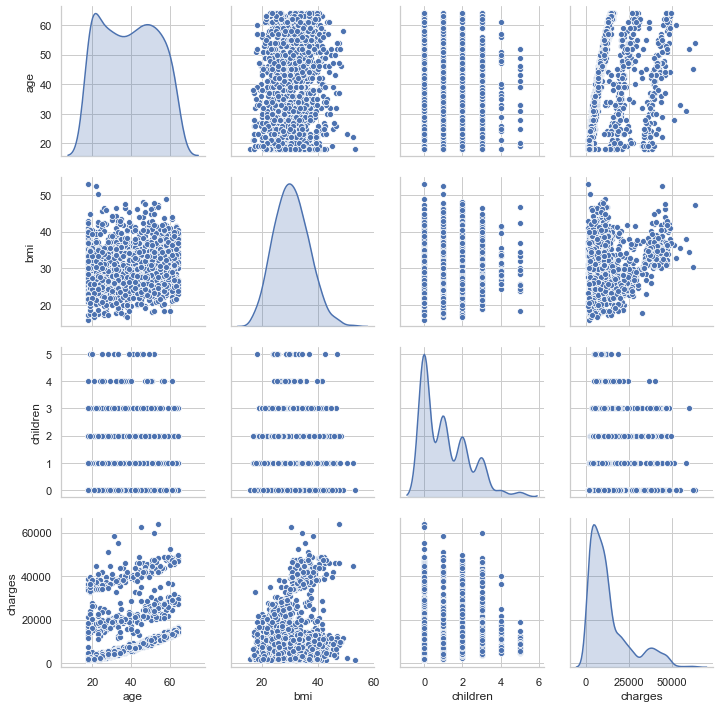

In [316]:
plt.figure(figsize = (10, 6))
sns.pairplot(data=data, diag_kind = 'kde')

Based on these patterns, age seems to be an interesting feature to start our exploration with. Let's visualize the ages of the members. We will add a Kernel Density Estimator (KDE) to our histogram. The KDE is a non-parametric way to estimate the probability density function of a random variable. Kernel density estimation is a fundamental data smoothing problem where inferences about the population are made, based on a finite data sample.

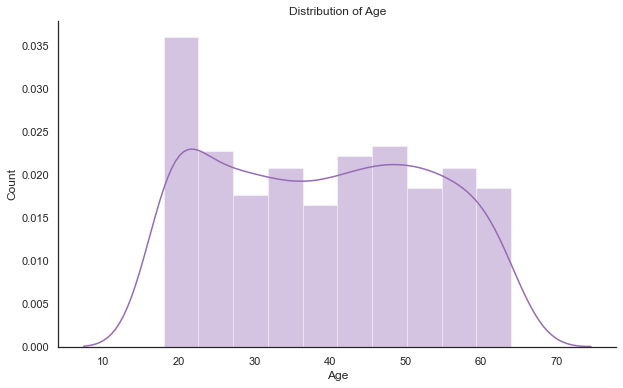

In [317]:
plt.figure(figsize = (10, 6))
sns.set(style="white", palette="muted", color_codes=True)
plt.rcParams['figure.figsize'] = (10, 5)
sns.distplot(data['age'], bins = 10, color = 'm', kde = True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
sns.despine()
plt.show()

Text(0.5, 1.0, 'Age vs Charges')

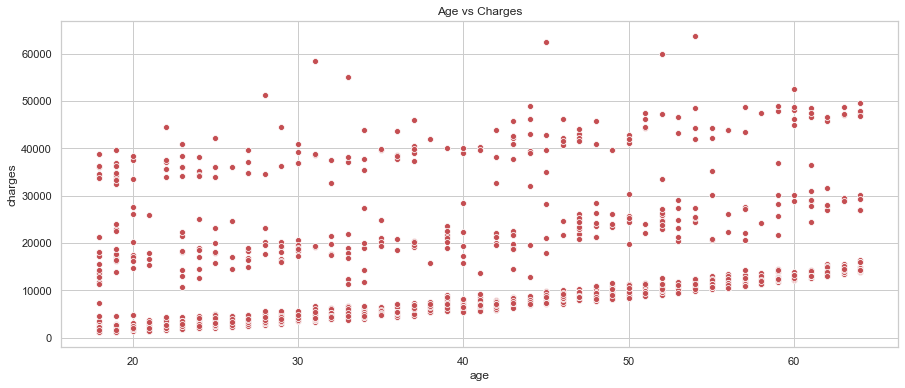

In [318]:
markers = {"Age": "s", "charges": "X"}

plt.figure(figsize = (15, 6))
sns.set(style="whitegrid")
sns.scatterplot(x= data['age'] , y= data['charges'], color = 'r', markers = markers)
plt.title("Age vs Charges")
#sns.despine()

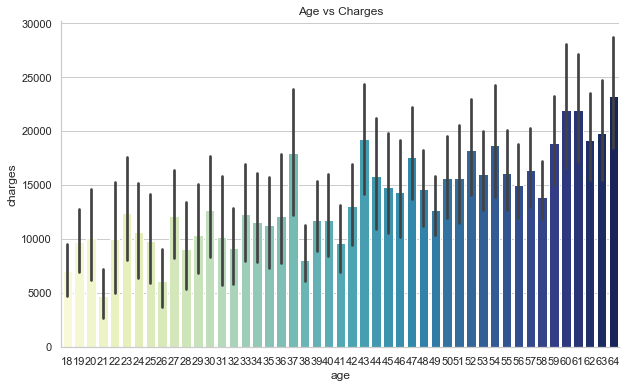

In [319]:
plt.figure(figsize = (10,6))
sns.barplot(x = 'age', y = 'charges', data = data, palette ='YlGnBu')
plt.title("Age vs Charges")
sns.despine()

As expected, charges go up with age. We see from the scatterplot that there are 3 distinct cohorts of members that can be described as low-cost, medium-cost and high-cost members. We can also see from the bar grapht that at certain ages, the charges spike, like at age 22 and 27. We hypothesize that at 22 many people get their first job and consequently their first insurance plan, and at 27 those who remained on their parents plan were forced to buy their own, since the ACA allows children to be on their parents' plans until age 26.

On that note, it might be interesting to look at the relationship between a member's number of children and charges. First let's look at the distribution of the number of children using a countplot, which simply shows the counts of the observations in each category (in this case, number of children), using bars. Then, we will use box and whisker plots to show distributions with respect to each category. A box and whisker plot is a standardized way of displaying the datset based on a five-number summary: the minimum, the maximum, the sample median, and the first and third quartiles.

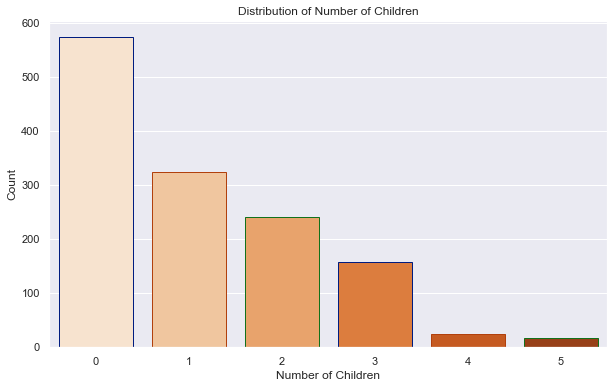

In [320]:
import seaborn as sns


plt.figure(figsize = (10, 6))
sns.set_style(style = "darkgrid")
sns.countplot(x= data['children'], palette = 'Oranges', edgecolor=sns.color_palette("dark", 3)).set_title('Distribution of Number of Children')
plt.xlabel('Number of Children')
plt.ylabel('Count')
#sns.despine()
plt.show()


In [321]:
#sns.color_palette?
sns.set_theme?


Object `sns.set_theme` not found.


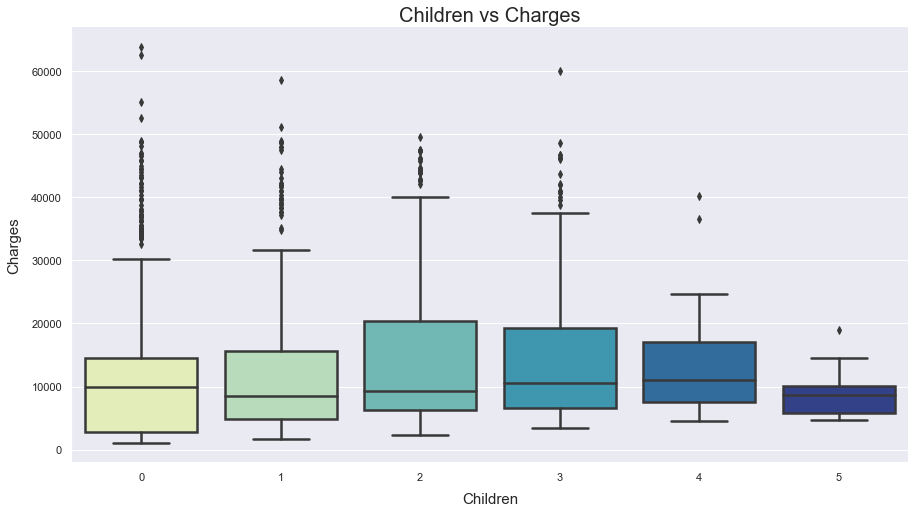

In [322]:
#sns.set_style("white")
sns.set_style(style = "darkgrid")
plt.figure(figsize = (15, 8))
sns.boxplot(x = 'children', y = 'charges', data = data, palette ='YlGnBu', linewidth=2.5)
plt.title('Children vs Charges', fontsize=20)
plt.xlabel("Children", fontsize=15, labelpad = 10)
plt.ylabel("Charges", fontsize=15, labelpad = 10)
sns.despine()

The number of children a member has an interesting impact on charges based on this plot: those with 2 or 3 kids have slightly higher charges than those with 0-1 or 4-5 kids. Next, lets take a look at gender using a pie chart.

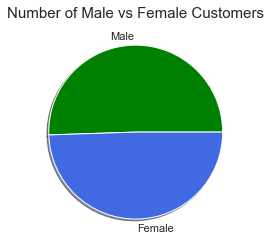

In [323]:

colors = ['Green', 'RoyalBlue']
labels = "Male", "Female"
size = (data['sex'].value_counts())
plt.rcParams['figure.figsize'] = (4,4)
plt.pie(size, data = data, colors = colors, labels = labels, shadow = True)
plt.title('Number of Male vs Female Customers', fontsize=15)

#plt.title('Number of Male vs Female Members', fontsize=20)
#plt.xlabel("Children", fontsize=15, labelpad = 10)
#plt.ylabel("Charges", fontsize=15, labelpad = 10)
plt.show()

There are about the same number of males and females in this dataset. Lets see how gender affects charges using a violin plot. Violin plots are similar to box plots, except that they also show the probability density of the data at different values, usually smoothed by a kernel density estimator. Typically a violin plot will include all the data that is in a box plot: a marker for the median of the data; a box or marker indicating the interquartile range; and possibly all sample points, if the number of samples is not too high.

### Number of Male vs Female Members

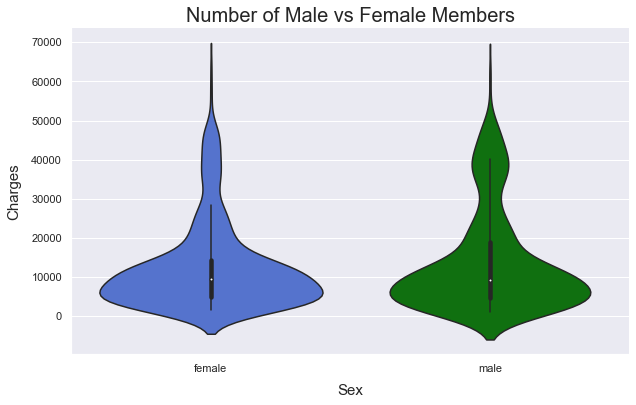

In [324]:
sns.set_style("darkgrid")
colors = ['RoyalBlue', 'Green']
plt.figure(figsize = (10, 6))
sns.violinplot(x = 'sex', y = 'charges', data = data, palette = colors, orient = 'v')
plt.title('Sex vs Charges')

plt.title('Number of Male vs Female Members', fontsize=20)
plt.xlabel("Sex", fontsize=15, labelpad = 10)
plt.ylabel("Charges", fontsize=15, labelpad = 10)

sns.despine()

From the upper end of the violin plot we see that in general, males have a greater number of high cost charges than females. It would be interesting to see how these charges depend on age as well. We'll use a basic scatter plot, but color the points based on sex.

### Charges vs Age Filtered by Sex

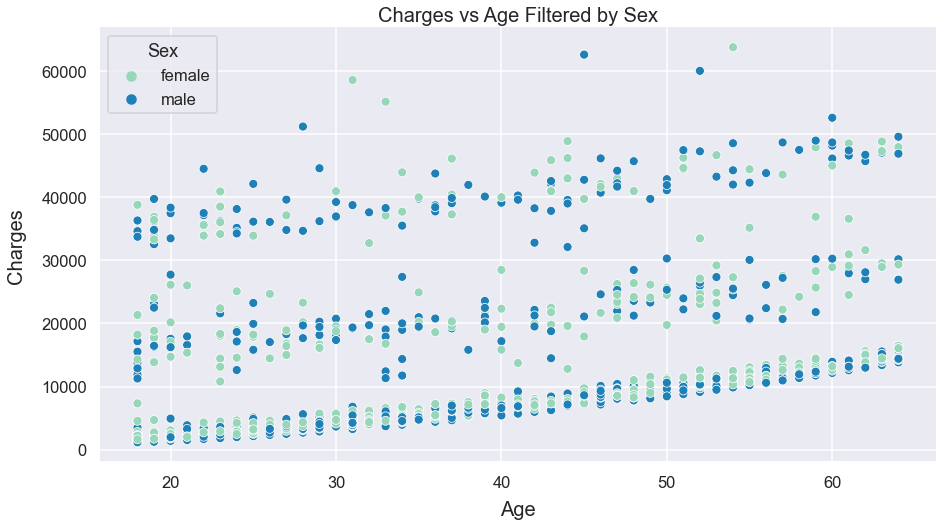

In [325]:
import seaborn as sns

sns.set_style("darkgrid")
sns.set_context('talk')
plt.figure(figsize = (15, 8))
ax =sns.scatterplot(x= 'age' , y= 'charges', hue = data.sex.tolist(), data= data,palette="YlGnBu" )
ax.legend(title='Sex', loc = "upper left") 
ax.set_title(label= "Charges vs Age Filtered by Sex", fontsize=20)
#plt.title('Number of Male vs Female Members', fontsize=20)
ax.set_xlabel("Age", fontsize=20, labelpad = 10)
ax.set_ylabel("Charges", fontsize=20, labelpad = 15)
sns.despine()



### Number of Smoking vs Non-Smoking Members

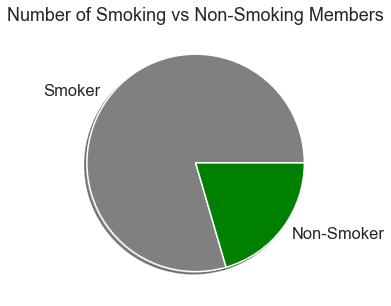

In [326]:
colors = ['gray', 'green']
labels = "Smoker", "Non-Smoker"
size = (data['smoker'].value_counts())
plt.rcParams['figure.figsize'] = (5,5)
plt.pie(size, colors = colors, labels = labels, shadow = True)
plt.title('Number of Smoking vs Non-Smoking Members')
plt.show()

### Charges vs Age Filtered by Smoking Status

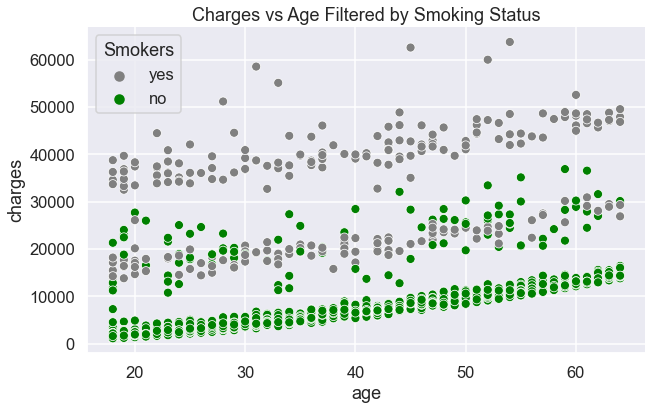

In [327]:
colors = ['gray', 'green']
plt.figure(figsize = (10, 6))
ax = sns.scatterplot(x= 'age' , y= 'charges', hue=data.smoker.tolist(), palette = colors, data=data)
ax.legend(title='Smokers', loc = "upper left") 
ax.set_title(label= "Charges vs Age Filtered by Smoking Status")
sns.despine()


Perhaps unsurprisingly, smokers consistently seem to have higher charges on average than non-smokers, independent of age. Let's see how BMI plays into this.



### Charges vs Age filtered by BMI

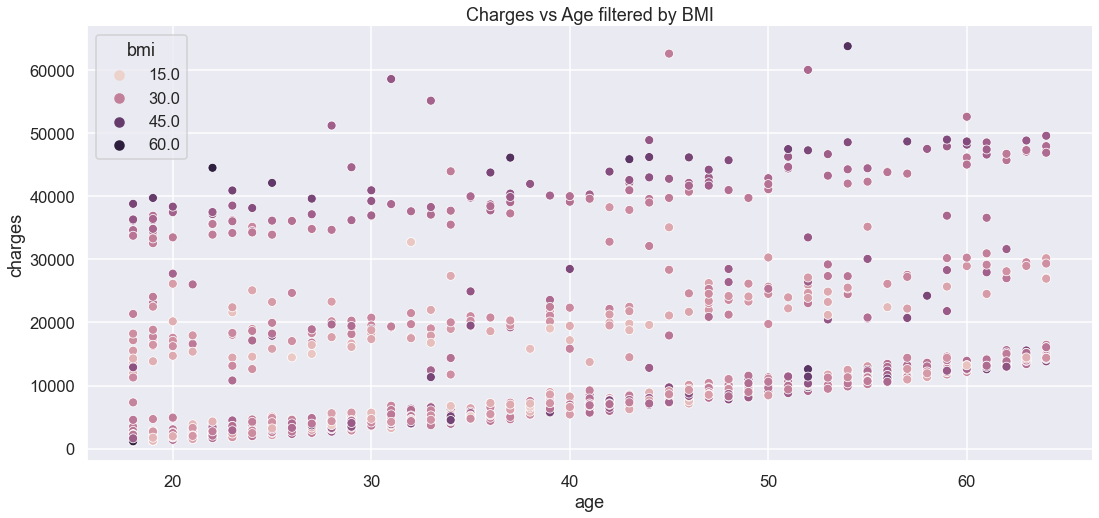

In [469]:
sns.set_context('talk')
plt.figure(figsize = (18, 8))
ax = sns.scatterplot(x= 'age' , y= 'charges', hue = data.bmi.tolist(), data=data)
ax.legend(title='bmi', loc = "upper left") 
ax.set_title(label= "Charges vs Age filtered by BMI")

sns.despine()

### Categorize customers into high BMI, normal BMI for smokers and non-smokers

Members with higher BMIs, on average experience higher charges, again independent of age. Now that we have explored the relationship between BMI and charges, and smoking and charges, we are curious about the combined impact of having a high BMI AND smoking. First, let's define a new categorical variable: "BMI_smoker". We will define "high BMI" to be >= 30 and take a look at the head of this dataset including this newly created variable.



In [329]:
data['BMI_smoker'] = 'default'
data.loc[(data.bmi >= 30) & (data.smoker == 'yes'), 'BMI_smoker'] = 'High_BMI_smoker'
data.loc[(data.bmi >= 30) & (data.smoker == 'no'), 'BMI_smoker'] = 'High_BMI_no_smoker'
data.loc[(data.bmi < 30) & (data.smoker == 'yes'), 'BMI_smoker'] = 'Normal_BMI_smoker'
data.loc[(data.bmi < 30) & (data.smoker == 'no'), 'BMI_smoker'] = 'Normal_BMI_no_smoker'
data.head()

,age,sex,bmi,children,smoker,region,charges,BMI_smoker
0,19,female,27.900,0,yes,southwest,16884.92400,Normal_BMI_smoker
1,18,male,33.770,1,no,southeast,1725.55230,High_BMI_no_smoker
2,28,male,33.000,3,no,southeast,4449.46200,High_BMI_no_smoker
3,33,male,22.705,0,no,northwest,21984.47061,Normal_BMI_no_smoker
4,32,male,28.880,0,no,northwest,3866.85520,Normal_BMI_no_smoker


### Charges vs Age Filtered by BMI_smoker

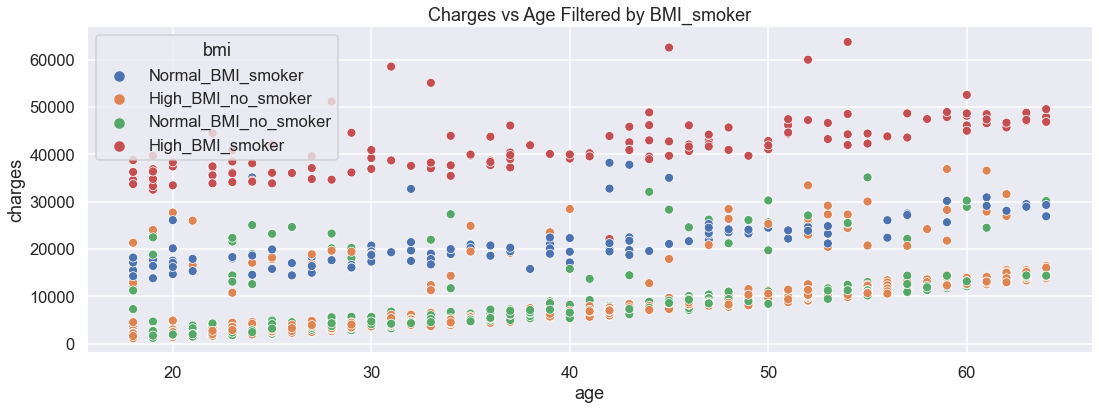

In [466]:
sns.set_context('talk')
plt.figure(figsize = (18,6))
ax = sns.scatterplot(x= 'age' , y= 'charges', hue= data.BMI_smoker.tolist(), palette = 'deep', data=data)
ax.legend(title='bmi', loc = "upper left") 
ax.set_title(label= "Charges vs Age Filtered by BMI_smoker")
sns.despine()

Clearly, being a smoker and having a high BMI is highly correlated with having high charges. If you have a high BMI, smoking is especially strongly correlated with you having high insurance claims. And inversely, if you are a smoker, a high BMI is particularly indicative of having high insurance claims.

Next we can visualize the regions to which members belong.

### Distribution of Customers Living in Different Regions

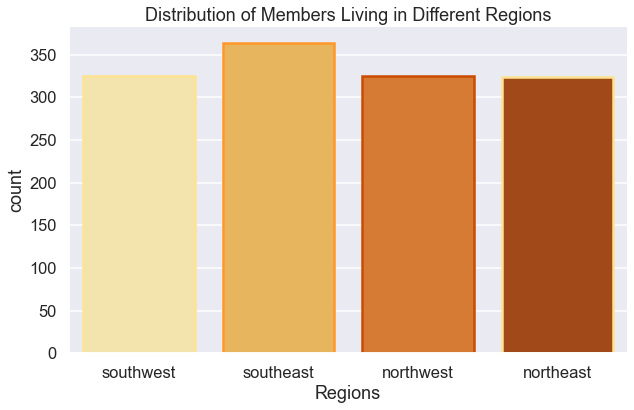

In [331]:
plt.figure(figsize = (10, 6))
sns.countplot(data['region'], palette='YlOrBr', edgecolor=sns.color_palette("YlOrBr", 3), linewidth=2.5)\
.set_title('Distribution of Members Living in Different Regions')

plt.xlabel('Regions')
plt.ylabel('count')
sns.despine()
plt.show()

### Region vs Charges

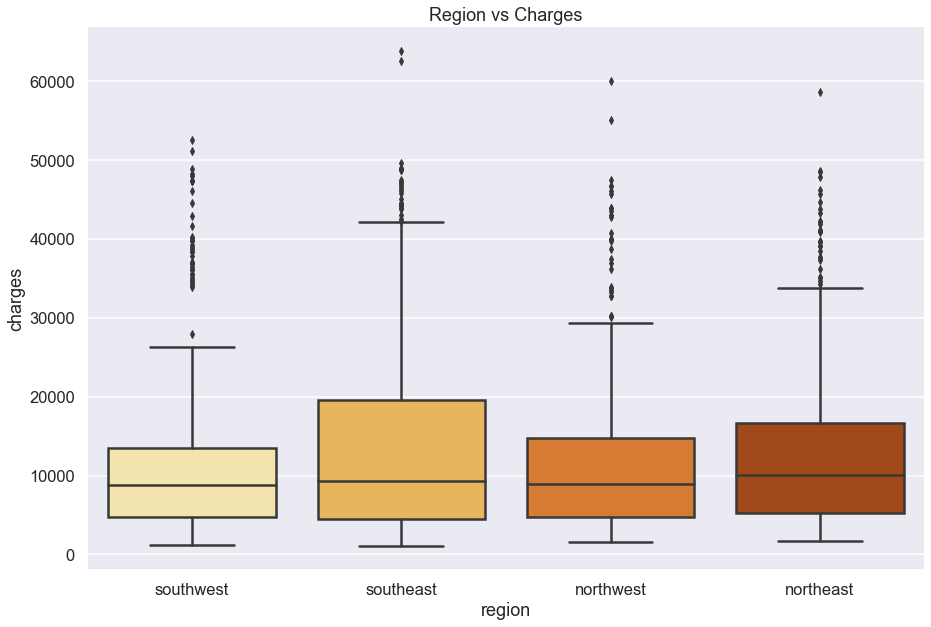

In [332]:

plt.figure(figsize = (15, 10))
sns.boxplot(x = 'region', y = 'charges', data = data, palette ='YlOrBr', linewidth=2.5)
plt.title('Region vs Charges')
sns.despine()

From this plot we can see that members in the Southeast region have relatively higher charges than others, but overall the effect does not seem dramatic.

Finally, we will display the correlation plot or heatmap for the dataset. Seaborn offers a convenient way to plot rectangular data as a color-encoded matrix. However, in order to get the full picture of our dataset, we first need to convert a couple of the categorical variables to numeric variables: sex and smoker.

In [333]:
data['male']=data['sex'].replace('female', 0,inplace=False)
data['male']=data['sex'].replace('male', 1,inplace=False)
data['smoker'].replace('no', 0,inplace=True)
data['smoker'].replace('yes', 1,inplace=True)
data2 = data.copy()
data2.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'BMI_smoker', 'male'],
      dtype='object')

In [334]:

data2.drop(['sex'], axis=1, inplace = True)
data2.columns

Index(['age', 'bmi', 'children', 'smoker', 'region', 'charges', 'BMI_smoker',
       'male'],
      dtype='object')

In [335]:
f, ax = plt.subplots(figsize = (10, 10))
corr = data2.corr()
ax.set_ylim(-1.5,2.5)
sns.heatmap(corr, linewidths=.5, annot=True, square = True, ax = ax,cmp = )

SyntaxError: invalid syntax (<ipython-input-335-424a6821c5a5>, line 4)

In conclusion, based on our final correlation plot, it appears that smoking is the most correlated with charges among these variables. It is followed by age, BMI, number of children and then sex.

### The goal is to find the best estimator of insurance charges using machine learning algorithms.

In [470]:
ml_df = data.copy()

ml_df



,age,sex,bmi,children,smoker,region,charges,BMI_smoker,male
0,19,female,27.900,0,1,southwest,16884.92400,Normal_BMI_smoker,female
1,18,male,33.770,1,0,southeast,1725.55230,High_BMI_no_smoker,1
2,28,male,33.000,3,0,southeast,4449.46200,High_BMI_no_smoker,1
3,33,male,22.705,0,0,northwest,21984.47061,Normal_BMI_no_smoker,1
4,32,male,28.880,0,0,northwest,3866.85520,Normal_BMI_no_smoker,1
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,0,northwest,10600.54830,High_BMI_no_smoker,1
1334,18,female,31.920,0,0,northeast,2205.98080,High_BMI_no_smoker,female
1335,18,female,36.850,0,0,southeast,1629.83350,High_BMI_no_smoker,female
1336,21,female,25.800,0,0,southwest,2007.94500,Normal_BMI_no_smoker,female


In [363]:
### Checking the null values:
missing_values = ml_df.isnull().sum().sort_values(ascending = False)
missing_values = missing_values[missing_values > 0]/ml_df.shape[0] # normalize
print(f'{missing_values *100} %')

Series([], dtype: float64) %


In [395]:
from sklearn.preprocessing import LabelEncoder
# convert str values to int using the scikit-learn encoder

st = ml_df.apply(LabelEncoder().fit_transform)
st.head()

,age,bmi,children,smoker,charges,sex_female,sex_male,region_northeast,region_northwest,region_southeast,region_southwest,BMI_smoker_High_BMI_no_smoker,BMI_smoker_High_BMI_smoker,BMI_smoker_Normal_BMI_no_smoker,BMI_smoker_Normal_BMI_smoker,male_1,male_female
0,1,197,0,1,1005,1,0,0,0,0,1,0,0,0,1,0,1
1,0,350,1,0,57,0,1,0,0,1,0,1,0,0,0,1,0
2,10,331,3,0,306,0,1,0,0,1,0,1,0,0,0,1,0
3,15,73,0,0,1097,0,1,0,1,0,0,0,0,1,0,1,0
4,14,223,0,0,254,0,1,0,1,0,0,0,0,1,0,1,0


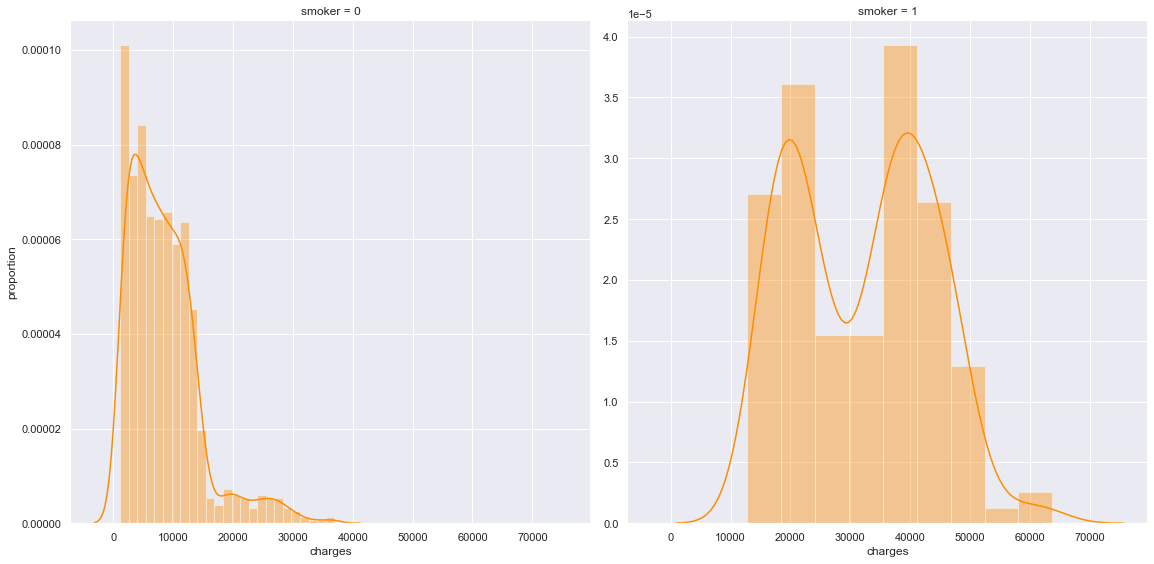

In [460]:

sns.set()
g = sns.FacetGrid(ml_df, col="smoker",hue = "smoker", height = 8, sharey=False, sharex = True, palette = "deep")
g.map(sns.distplot, "charges", color = 'DarkOrange')
g.set_axis_labels("charges", "proportion")
g.despine(left=True)

<AxesSubplot:title={'center':'Age Distribution of customers'}, xlabel='age'>

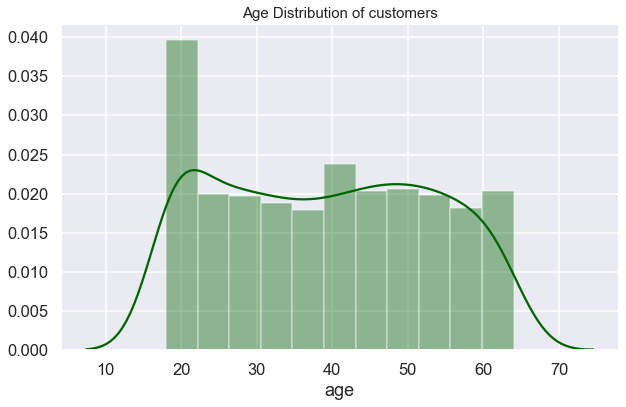

In [471]:
### plot again: 

plt.figure(figsize = (10,6))
plt.title("Age Distribution of customers", fontsize = 15)

sns.distplot(ml_df["age"], color = 'DarkGreen')

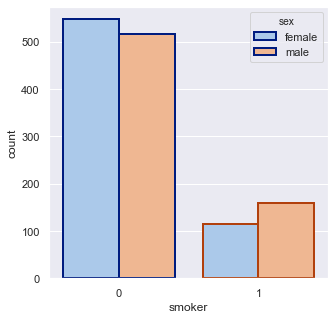

In [461]:
sns.countplot(x= "smoker", hue = "sex",data = data, palette='pastel',edgecolor=sns.color_palette("dark", 3),linewidth=2);
plt.show()

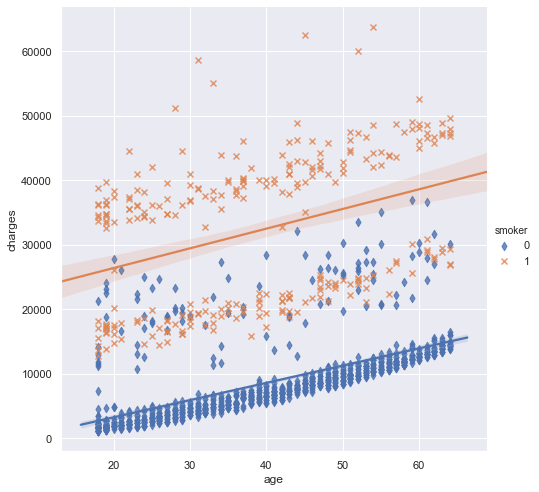

In [462]:


sns.lmplot(x="age", y="charges", hue="smoker", data= data, palette="deep", height = 7, markers=['d', 'x'])
ax.set_title('Smokers and non-smokers')
plt.show()

### Machine Learning
First step is to apply get dummies which works like this:

The pandas.get_dummies converts the vectors of categorical features into a vector-matrix multiplication with a boolean matrix of ones and zeros. This will be more useful since our regressor will treat the inputs as numbers instead of integers.

In [369]:
ml_df['age'] = ml_df['age'].astype(float)
ml_df['children'] = ml_df['children'].astype(float)

ml_df = pd.get_dummies(ml_df)

ml_df.head()

,age,bmi,children,smoker,charges,sex_female,sex_male,region_northeast,region_northwest,region_southeast,region_southwest,BMI_smoker_High_BMI_no_smoker,BMI_smoker_High_BMI_smoker,BMI_smoker_Normal_BMI_no_smoker,BMI_smoker_Normal_BMI_smoker,male_1,male_female
0,19.0,27.900,0.0,1,16884.92400,1,0,0,0,0,1,0,0,0,1,0,1
1,18.0,33.770,1.0,0,1725.55230,0,1,0,0,1,0,1,0,0,0,1,0
2,28.0,33.000,3.0,0,4449.46200,0,1,0,0,1,0,1,0,0,0,1,0
3,33.0,22.705,0.0,0,21984.47061,0,1,0,1,0,0,0,0,1,0,1,0
4,32.0,28.880,0.0,0,3866.85520,0,1,0,1,0,0,0,0,1,0,1,0


In [370]:
y = ml_df['charges']
X = ml_df.drop(columns=['charges'])

### Splitting the data into train and test parts:

In [371]:
from sklearn.model_selection import train_test_split


# use 10% of dataset as testing data

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42)

### Linear Regression Model:

In [372]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error


lr = LinearRegression().fit(X_train, y_train)

lr_train_pred = lr.predict(X_train)
lr_test_pred = lr.predict(X_test)

lr_train_mse = mean_squared_error(y_train, lr_train_pred)
lr_test_mse = mean_squared_error(y_test, lr_test_pred)

print('MSE train data: {:.5}, MSE test data: {:.5}'.format(lr_train_mse, lr_test_mse))

print('RMSE train data: {:.5}, RMSE test data: {:.5}'.format(
    np.sqrt(np.absolute(lr_train_mse)), 
    np.sqrt(np.absolute(lr_train_mse))))
                                                               
print('R2 train data: {:.5}, R2 test data: {:.5}'.format(
    r2_score(y_train,lr_train_pred),
    r2_score(y_test,lr_test_pred)))

MSE train data: 2.0245e+07, MSE test data: 1.7378e+07
RMSE train data: 4499.5, RMSE test data: 4499.5
R2 train data: 0.86272, R2 test data: 0.87403


### The liner regression obtains variance score of 74% for training data, and 76% for test data.

In [373]:
from sklearn.model_selection import cross_val_score
lr_cv = cross_val_score(LinearRegression(), X, y, cv = 7)
# accuracy +/- 2 standard deviations
print("Accuracy: {:.2} (+/- {:.2})".format(lr_cv.mean(), lr_cv.std() * 2))

Accuracy: 0.86 (+/- 0.1)


### Adding PolynomialFeatures : 

In [374]:

from sklearn.preprocessing import PolynomialFeatures

X_poly =  PolynomialFeatures(degree = 2).fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_poly, y, test_size=0.1, random_state=42)

In [375]:
pr = LinearRegression().fit(X_train, y_train)

pr_train_pred = pr.predict(X_train)
pr_test_pred = pr.predict(X_test)

pr_train_mse = mean_squared_error(y_train,pr_train_pred)
pr_test_mse = mean_squared_error(y_test,pr_test_pred)


print('MSE train data: {:.5}, MSE test data: {}'.format(pr_train_mse, pr_test_mse))

print('RMSE train data: {:.5}, RMSE test data: {:.5}'.format(
    np.sqrt(np.absolute(pr_train_mse)), 
    np.sqrt(np.absolute(pr_train_mse))))
                                                               
print('R2 train data: {:.5}, R2 test data: {:.5}'.format(
    r2_score(y_train,pr_train_pred),
    r2_score(y_test,pr_test_pred)))

MSE train data: 1.8672e+07, MSE test data: 18118648.80064936
RMSE train data: 4321.1, RMSE test data: 4321.1
R2 train data: 0.87339, R2 test data: 0.86866


### Addiing Polynomial Features increses variance score of 86% for training data, and 85% for test data.

In [376]:
pr_cv = cross_val_score(LinearRegression(), X_poly, y, cv = 7)
# accuracy +/- 2 standard deviations
print("Accuracy: {:.2} (+/- {:.2})".format(pr_cv.mean(), pr_cv.std() * 2))

Accuracy: 0.86 (+/- 0.089)


In [377]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators = 50).fit(X_train, y_train)

rfr_train_pred = rfr.predict(X_train)
rfr_test_pred = rfr.predict(X_test)


rfr_train_mse = mean_squared_error(y_train,rfr_train_pred)
rfr_test_mse = mean_squared_error(y_test,rfr_test_pred)


print('MSE train data: {:.5}, MSE test data: {:.5}'.format(rfr_train_mse, rfr_test_mse))

print('RMSE train data: {:.5}, RMSE test data: {:.5}'.format(
    np.sqrt(np.absolute(rfr_train_mse)), 
    np.sqrt(np.absolute(rfr_train_mse))))
                                                               
print('R2 train data: {:.5}, R2 test data: {:.5}'.format(
    r2_score(y_train, rfr_train_pred),
    r2_score(y_test, rfr_test_pred)))

MSE train data: 3.7937e+06, MSE test data: 2.2203e+07
RMSE train data: 1947.7, RMSE test data: 1947.7
R2 train data: 0.97428, R2 test data: 0.83906


### Random Forest Regressor further increses variance score of 97% for training data, and 83% for test data.

In [378]:
rfr_cv = cross_val_score(RandomForestRegressor(n_estimators = 50), X_poly, y, cv = 7)
# accuracy +/- 2 standard deviations
print("Accuracy: {:.2} (+/- {:.2})".format(rfr_cv.mean(), rfr_cv.std() * 2))

Accuracy: 0.83 (+/- 0.1)


In [379]:

from sklearn.linear_model import BayesianRidge

br = BayesianRidge().fit(X_train, y_train)

br_train_pred = br.predict(X_train)
br_test_pred = br.predict(X_test)


br_train_mse = mean_squared_error(y_train, br_train_pred)
br_test_mse = mean_squared_error(y_test, br_test_pred)


print('MSE train data: {:.5}, MSE test data: {:.5}'.format(br_train_mse, br_test_mse))

print('RMSE train data: {:.5}, RMSE test data: {:.5}'.format(
    np.sqrt(np.absolute(br_train_mse)), 
    np.sqrt(np.absolute(br_train_mse))))
                                                               
print('R2 train data: {:.5}, R2 test data: {:.5}'.format(
    r2_score(y_train, br_train_pred),
    r2_score(y_test, br_test_pred)))

MSE train data: 1.9266e+07, MSE test data: 1.6947e+07
RMSE train data: 4389.3, RMSE test data: 4389.3
R2 train data: 0.86936, R2 test data: 0.87716


In [380]:

br_cv = cross_val_score(BayesianRidge(), X_poly, y, cv = 7)
# accuracy +/- 2 standard deviations
print("Accuracy: {:.2} (+/- {:.2})".format(br_cv.mean(), br_cv.std() * 2))

Accuracy: 0.86 (+/- 0.083)


From above evaluation, we can deduce that the Random Forest wins with a variance score of 97% against training data, and 84% against data it has never seen before. It also has the lowest root MSE value.

With cross-validation, however, Bayesian regression gets the same average as the Random Forest but with a smaller standard deviation using 7 folds.

However, we do not have to worry about overfitting with Random Forest.